In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [ ]:
dataset = pd.read_csv("diamonds.csv")  
dataset.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
dataset.replace(to_replace="Fair",value='0',inplace=True)
dataset.replace(to_replace="Good",value='1',inplace=True)
dataset.replace(to_replace="Ideal",value='2',inplace=True)
dataset.replace(to_replace="Premium",value='3',inplace=True)
dataset.replace(to_replace="Very Good",value='4',inplace=True)

In [ ]:
dataset.replace(to_replace="J",value='0',inplace=True)
dataset.replace(to_replace="I",value='1',inplace=True)
dataset.replace(to_replace="H",value='2',inplace=True)
dataset.replace(to_replace="G",value='3',inplace=True)
dataset.replace(to_replace="F",value='4',inplace=True)
dataset.replace(to_replace="E",value='5',inplace=True)
dataset.replace(to_replace="D",value='6',inplace=True)

In [ ]:
dataset.replace(to_replace="I1",value='0',inplace=True)
dataset.replace(to_replace="SI2",value='1',inplace=True)
dataset.replace(to_replace="SI1",value='2',inplace=True)
dataset.replace(to_replace="VS2",value='3',inplace=True)
dataset.replace(to_replace="VS1",value='4',inplace=True)
dataset.replace(to_replace="VVS2",value='5',inplace=True)
dataset.replace(to_replace="VVS1",value='6',inplace=True)
dataset.replace(to_replace="IF",value='7',inplace=True)

In [ ]:
feature_columns =['carat','color','clarity','depth','table','price','x','y','z']
X = dataset[feature_columns].values
Y = dataset['cut'].values

In [ ]:
dataset.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,5,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

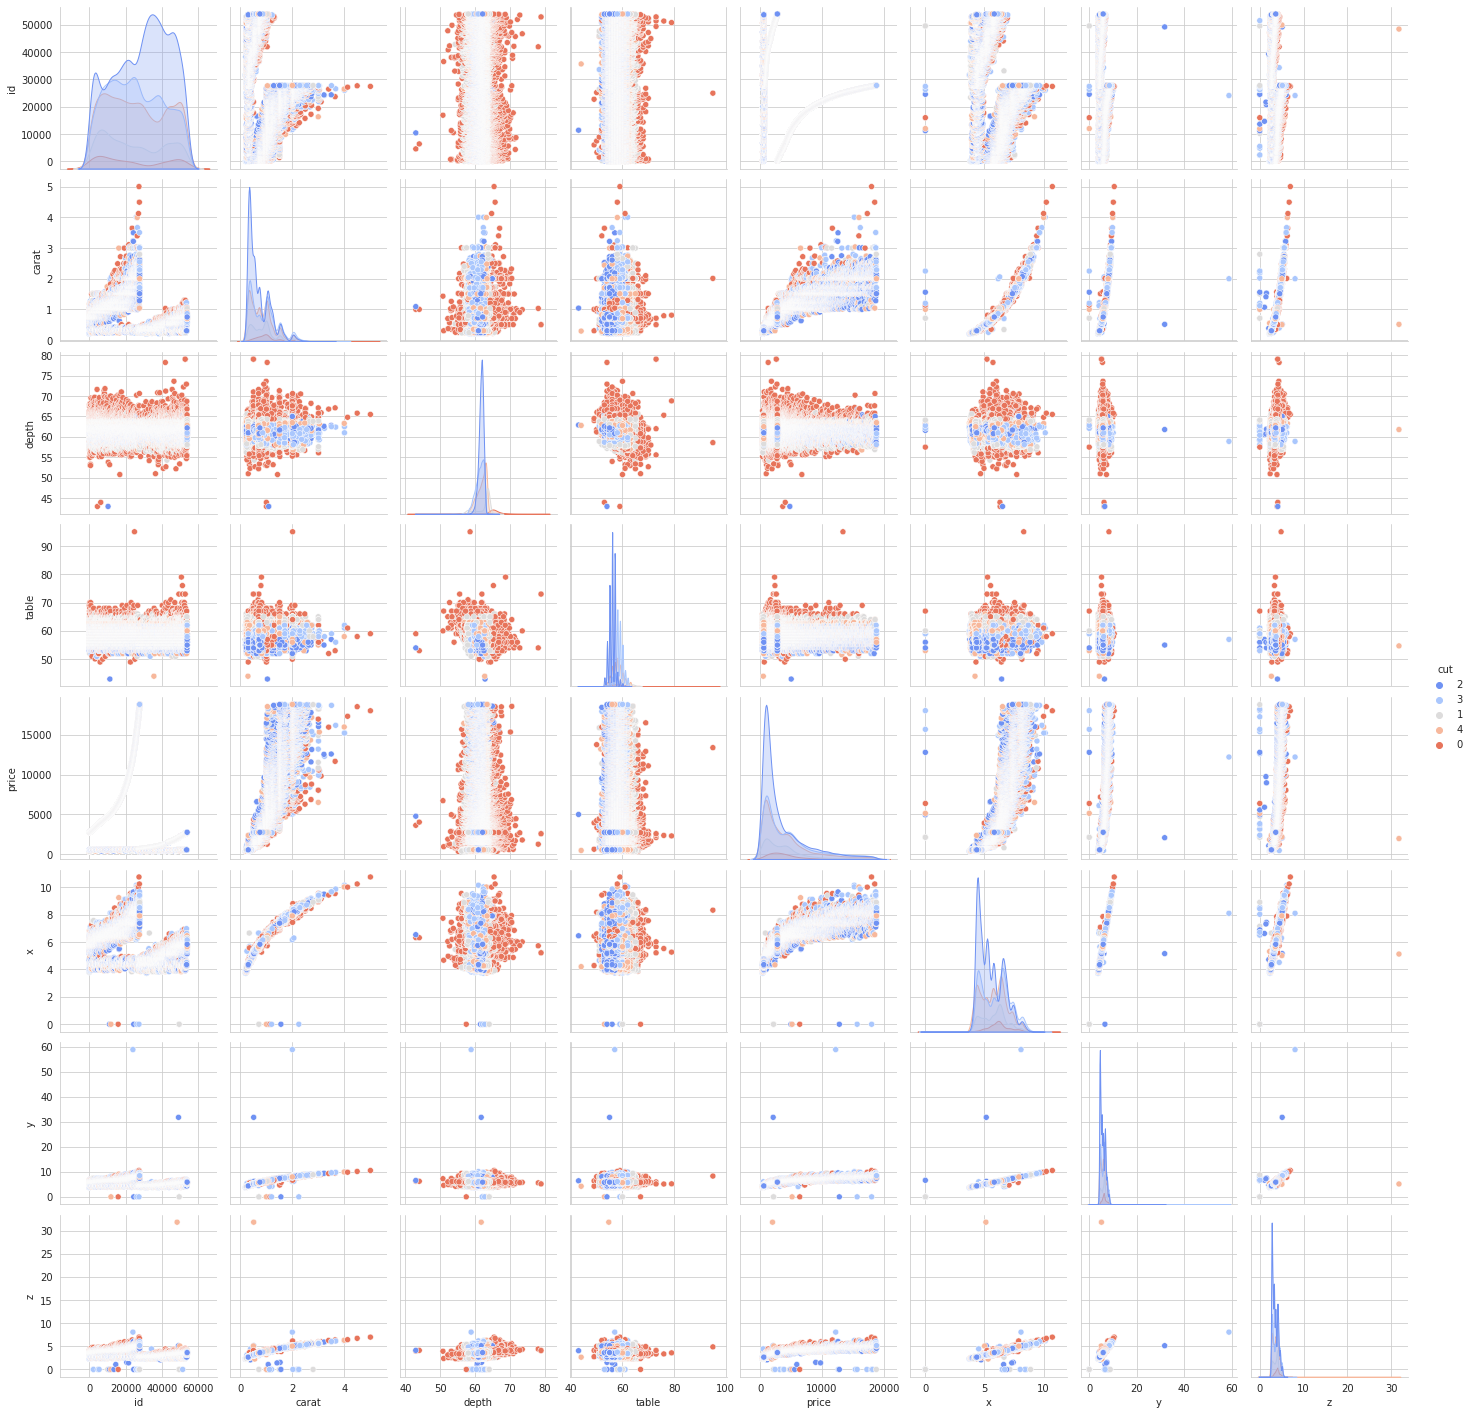

In [ ]:
sns.pairplot(dataset,hue='cut',palette='coolwarm')

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')
print(classification_report(Y_test,Y_pred))

Accuracy of our model is equal 52.93 %.
              precision    recall  f1-score   support

           0       0.40      0.25      0.31       324
           1       0.26      0.28      0.27       973
           2       0.63      0.80      0.70      4273
           3       0.54      0.49      0.51      2790
           4       0.37      0.24      0.29      2428

    accuracy                           0.53     10788
   macro avg       0.44      0.41      0.42     10788
weighted avg       0.51      0.53      0.51     10788



In [ ]:
k_list = list(range(1,50,2))
cv_scores = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

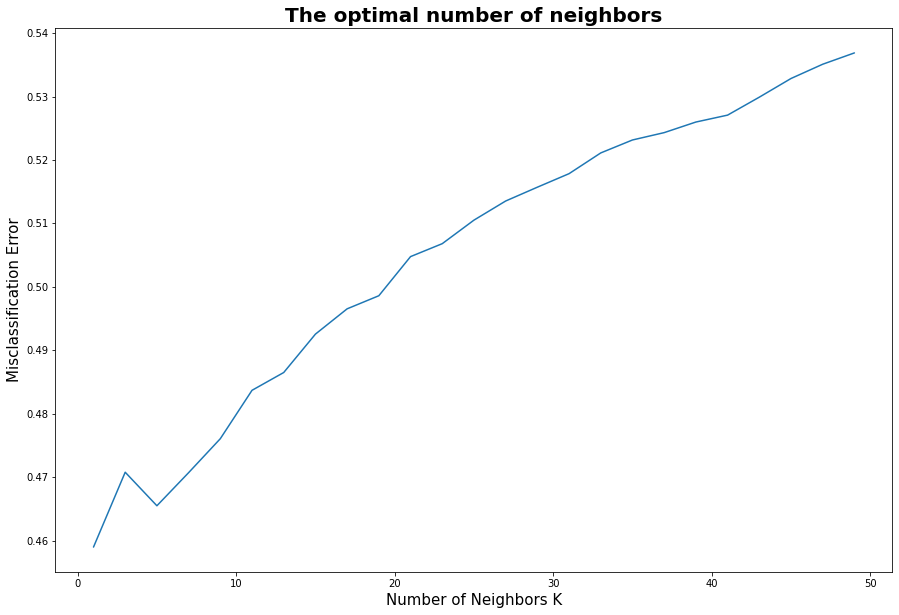

The optimal number of neighbors is 1.


In [ ]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)